In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 

# Age at the time of analysis. 18-36 (0, 1) 

# Childish diseases (ie , chicken pox, measles, mumps, polio)	1) yes, 2) no. (0, 1) 

# Accident or serious trauma 1) yes, 2) no. (0, 1) 

# Surgical intervention 1) yes, 2) no. (0, 1) 

# High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 

# Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1) 

# Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 

# Number of hours spent sitting per day ene-16	(0, 1) 

# Output: Diagnosis	normal (N), altered (O)	

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt',
                names=['season','age','child_dis','accident','surgery','fevers','alcohol','smoke',
                      'hrs_sit','output'])
df.head()

,season,age,child_dis,accident,surgery,fevers,alcohol,smoke,hrs_sit,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [3]:
df['output'].replace({'N':0,'O':1}, inplace=True)
df.head()

,season,age,child_dis,accident,surgery,fevers,alcohol,smoke,hrs_sit,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [4]:
#Create X and y

from sklearn.preprocessing import minmax_scale

X = df.drop('output', axis=1)

y = df['output']

X = minmax_scale(X.values) #scaled X - it's already scaled in the data, but just verifying

print(X.shape)
print(y.shape)

(100, 9)
(100,)


In [5]:
#Split into test and train datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.2, random_state=42)

print(X.shape)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 9)
(80, 9)
(20, 9)
(80,)
(20,)


### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

coefficients = pd.concat([pd.DataFrame(df.drop('output',axis=1).columns),pd.DataFrame(np.transpose(model.coef_))],axis=1)
print(coefficients)
print("\n Intercept: ", model.intercept_)

           0         0
0     season  0.182129
1        age  0.255675
2  child_dis  0.047314
3   accident -0.200034
4    surgery  0.107660
5     fevers  0.000634
6    alcohol -0.219346
7      smoke  0.069422
8    hrs_sit  0.172013

 Intercept:  0.019121366534199713


In [7]:
y_test_predict = model.predict(X_test)

print("Prediction: \n", y_test_predict)

Prediction: 
 [ 0.03521711 -0.03002722 -0.0523299  -0.03268786 -0.25651078 -0.00968893
  0.00603618  0.02777579  0.0514097   0.10548949  0.16918937  0.2977493
 -0.02790291  0.13715384  0.08827513 -0.06933147  0.31910097 -0.05352826
  0.22402587  0.1297536 ]


In [8]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 0.1325462595324746
RMSE is 0.3640690312735685
R^2 is -0.47273621702749513


### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

df_log1 = LogisticRegression().fit(X_train, Y_train)

print('Accuracy of logistic regression classifier on test data: {:.2f}'.format(df_log1.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test data: 0.90


In [10]:
coefficients = pd.concat([pd.DataFrame(df.drop('output',axis=1).columns),pd.DataFrame(np.transpose(df_log1.coef_))],axis=1)
print(coefficients)

           0         0
0     season  0.754181
1        age  0.576140
2  child_dis -0.301991
3   accident -1.162639
4    surgery  0.383264
5     fevers -0.505802
6    alcohol -1.092893
7      smoke  0.266267
8    hrs_sit -0.409759


In [11]:
from sklearn.metrics import confusion_matrix

y_pred = df_log1.predict(X)
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

print('According to the above matrix, we have', 88+0,'correct predictions and'\
      , 12+0, 'incorrect predictions.')

[[88  0]
 [12  0]]
According to the above matrix, we have 88 correct predictions and 12 incorrect predictions.


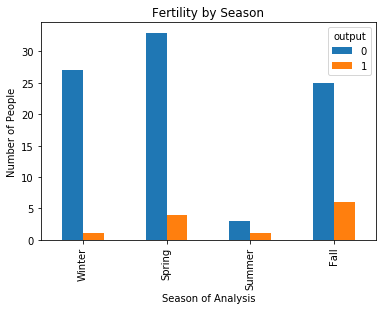

In [12]:
pd.crosstab(df['season'], y).plot(kind='bar')
plt.title('Fertility by Season')
plt.xlabel('Season of Analysis')
plt.ylabel('Number of People')
plt.xticks(np.arange(4),('Winter','Spring','Summer','Fall'))
plt.show()

# Obviously some skew to this because not many were tested in summer

In [16]:
majority_class = Y_train.mode()[0]
Y_pred = np.full(shape=Y_test.shape, fill_value=majority_class)

In [18]:
Y_pred.shape, Y_test.shape

((20,), (20,))

In [19]:
all(y_pred==majority_class)

True

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9

In [23]:
df.output.value_counts(normalize=True)

#Not quite 90%, but close

0    0.88
1    0.12
Name: output, dtype: float64

In [25]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(LogisticRegression(solver='lbfgs'))
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9

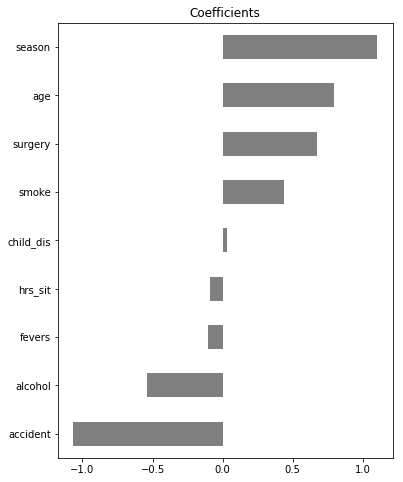

In [33]:
plt.figure(figsize=(6,8))
plt.title('Coefficients')

coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = df.drop('output', axis=1).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, Y_train, scoring ='accuracy', cv=10)

In [35]:
scores

#They're all the SAME, probably because this dataset is so small

array([0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875,
       0.875])

In [36]:
scores.mean(), scores.std()

(0.875, 0.0)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, y_val = train_test_split(X_train, Y_train)

In [40]:
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, y_val.shape, Y_test.shape

((60, 9), (20, 9), (20, 9), (60,), (20,), (20,))

In [41]:
pipeline.fit(X_train, Y_train)
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, Y_pred)

0.9

## Shuffling

In [43]:
def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [44]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, shuffle=False)

In [45]:
y_train

0     0
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    1
20    0
21    0
22    0
23    1
24    0
25    0
26    1
27    1
28    0
29    1
     ..
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    1
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
Name: output, Length: 80, dtype: int64

In [46]:
y_val

80    0
81    0
82    0
83    0
84    1
85    0
86    0
87    0
88    0
89    0
Name: output, dtype: int64

In [47]:
y_test

90    0
91    0
92    0
93    1
94    0
95    0
96    0
97    0
98    0
99    0
Name: output, dtype: int64

In [48]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, shuffle=True)

In [49]:
y_train

61    0
11    0
22    0
25    0
53    0
70    1
51    0
71    0
38    1
66    0
13    0
36    0
87    0
65    0
10    0
6     0
34    0
14    0
2     0
69    0
24    0
93    1
58    0
3     0
18    0
54    0
1     1
23    1
82    0
90    0
     ..
7     0
5     0
19    1
55    0
40    0
73    0
86    0
78    0
91    0
94    0
79    0
15    0
97    0
56    0
68    0
16    0
46    0
59    0
89    0
92    0
62    0
81    0
85    0
84    1
98    0
37    0
33    0
0     0
74    0
67    0
Name: output, Length: 80, dtype: int64

In [50]:
y_val

45    0
96    0
72    0
8     0
50    0
60    0
42    0
4     1
35    0
9     0
Name: output, dtype: int64

In [51]:
y_test

32    0
63    0
27    1
77    0
80    0
30    0
21    0
95    0
57    0
64    0
Name: output, dtype: int64

Shuffling ends up with the same result as not shuffling with this data set, but the data set is so small that it's not a good way to test.